In [64]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Comment to get non-deterministic results
np.random.seed(2)

In [66]:
#This class implementation is inspired from the NN implemented in cours IFT6093
class NN(object):
    
    '''
    @Arguments:
        input_dim: The input dimension
        output_dim: The output dimension
        hidden_dims: (h1 dimension, h2 dimension)
        n_hidden: number of hidden layers
        initialization: type of weigth initialization (zeros, normal or glorot)
    
    '''
    def __init__(self, input_dim, output_dim,hidden_dims=(1024,2048),n_hidden=2, initialization='zeros', mode=',train',
                 datapath=None,model_path=None):
        
        self.indim = input_dim
        self.hd1 = hidden_dims[0] 
        self.hd2 = hidden_dims[1]
        self.n_hidden = n_hidden
        self.outd = output_dim
        self.W1 = np.zeros(shape=(hidden_dims[0], input_dim))
        #print('W1.shape =', self.W1.shape)
        #print('W1 = ', self.W1)
        #print('\n')
        
        self.b1 = np.zeros(hidden_dims[0])
        #print('b1.shape =', self.b1.shape)
        #print('b1 = ', self.b1)
        #print('\n')
        
        self.W2 = np.zeros(shape=(hidden_dims[1], hidden_dims[0]))
        #print('W2.shape =', self.W2.shape)
        #print('W2 = ', self.W2)
        #print('\n')
        
        self.b2 = np.zeros(hidden_dims[1])
        #print('b2.shape =', self.b2.shape)
        #print('b2 = ', self.b2)
        #print('\n')
        
        self.W3 = np.zeros(shape=(output_dim, hidden_dims[1]))
        #print('W3.shape =', self.W3.shape)
        #print('W3 = ', self.W3)
        #print('\n')
        
        self.b3 = np.zeros(output_dim)
        #print('b3.shape =', self.b3.shape)
        #print('b3 = ', self.b3)
        #print('\n')
        
        if initialization=='normal':
            self.initialize_weights_normal()
            #print('W1 = ', self.W1)
            #print('W2 = ', self.W2)
            #print('W3 = ', self.W3)
            
            
        if initialization=='glorot':
            self.initialize_weights_glorot()
            #print('W1 = ', self.W1)
            #print('W2 = ', self.W2)
            #print('W3 = ', self.W3)
            
        
        self.parameters = [self.W3, self.b3, self.W2, self.b2, self.W1, self.b1]
        
        
    def initialize_weights_normal(self):
        
        self.W1 = np.random.normal(size=(self.hd1, self.indim))
        self.W2 = np.random.normal(size=(self.hd2, self.hd1))
        self.W3 = np.random.normal(size=(self.outd, self.hd2))
        
        return self
    
    
    def initialize_weights_glorot(self):
        
        dl1 = np.sqrt(6/(self.indim + self.hd1))
        dl2 = np.sqrt(6/(self.hd1 + self.hd2))
        dl3 = np.sqrt(6/(self.hd2 + self.outd))
        self.W1 = np.random.uniform(low=(-dl1), high=dl1, size=(self.hd1, self.indim))
        self.W2 = np.random.uniform(low=(-dl2), high=dl2, size=(self.hd2, self.hd1))
        self.W3 = np.random.uniform(low=(-dl3), high=dl3, size=(self.outd, self.hd2))
        
        return self
        
        
        
    #Method inspired from NN implemented in cours IFT6093
    def activation (self,input):
        return (input > 0) * input  
    
    #line 85

    def forward(self,x):
        #print('forward')
        
        a1 = np.dot (self.W1, x) + self.b1 
        #print('a1 = np.dot (self.W1, x) + self.b1')
        #print('a1.shape =', a1.shape)
        #print('a1 = ', a1)
        #print('\n')
        
        h1 = self.activation (a1)
        #print('h1 = self.activation (a1)')
        #print('h1.shape =', h1.shape)
        #print('h1 = ', h1)
        #print('\n')
        
        a2 = np.dot (self.W2, h1) + self.b2
        #print('a2 = np.dot (self.W2, h1) + self.b2')
        #print('a2.shape =', a2.shape)
        #print('a2 = ', a2)
        #print('\n')
        
        h2 = self.activation (a2)
        #print('h2 = self.activation (a2)')
        #print('h2.shape =', h2.shape)
        #print('h2 = ', h2)
        #print('\n')
        
    
        oa = np.dot (self.W3, h2) + self.b3
        #print('oa = np.dot (self.W3, h2) + self.b3')
        #print('oa.shape =', oa.shape)
        #print('oa = ', oa)
        #print('\n')
        
        os = self.softmax (oa, axis=0)
        #print('os = softmax (oa)')
        #print('os.shape =', os.shape)
        #print('os = ', os)
        #print('\n')
               
        return a1, h1, a2, h2, oa, os
    
    

    #Methods inspired from NN implemented in cours IFT6093
    def loss (self, y, os):
        return (y * (-np.log(os))).sum()
    

    def softmax (self,x,axis=1):
        shiftx = x - np.max (x, axis=axis, keepdims=True)
        exps = np.exp (shiftx)
        y = exps / exps.sum (axis=axis, keepdims=True)
        return y


    def backward(self, x, y, a1, h1, a2, h2, oa, os, weight_decay=0, cache=None):
        #print ('backward')
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        #print('os.shape = ', os.shape)
        grad_oa = os - y
        #print('grad_oa.shape =', grad_oa.shape)
        #print('\n')
        
        grad_W3 = np.outer (grad_oa, h2) + weight_decay * self.W3
        #print('grad_W3.shape =', grad_W3.shape)
        #print('\n')
        
        grad_b3 = grad_oa
        #print('grad_b3.shape =', grad_b3.shape)
        #print('\n')
        
        grad_h2 = np.dot (self.W3.T, grad_oa)
        #print(' grad_h2.shape =', grad_h2.shape)
        #print('\n')
        
        grad_a2 = (a2 > 0) * grad_h2
        #print('grad_a2.shape =', grad_a2.shape)
        #print('\n')
        
        grad_W2 = np.outer (grad_a2, h1) + weight_decay * self.W2
        #print('grad_W2.shape =', grad_W2.shape)
        #print('\n')
        
        grad_b2 = grad_a2 
        #print('grad_b2.shape =', grad_b2.shape)
        #print('\n')
        
        grad_h1 = np.dot (self.W2.T, grad_a2)
        #print('grad_h1.shape =', grad_h1.shape)
        #print('\n')
        
        grad_a1 = (a1 > 0) * grad_h1
        #print('grad_a1.shape =', grad_a1.shape)
        #print('\n')
        
        grad_W1 = np.outer (grad_a1, x) + weight_decay * self.W1
        #print('grad_W1.shape =', grad_W1.shape)
        #print('\n')
        
        grad_b1 = grad_a1
        #print('grad_b1.shape =', grad_b1.shape)
        #print('\n')
        
        grads=[grad_W3, grad_b3, grad_W2, grad_b2, grad_W1, grad_b1]
   
        return grads



    def update(self, grads, learning_rate):
        for p, grad in zip(self.parameters, grads):
            p -= learning_rate * grad
        
    #line 201   

    def train_SGD(self, x, y_onehot, n, learning_rate=1e-1, weight_decay=0):
        y= y_onehot
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        losses = 0
        if (n==1):
            a1, h1, a2, h2, oa, os = self.forward(x)
            grads = self.backward(x, y, a1, h1, a2, h2, oa, os)
            self.update(grads, learning_rate)
            loss = self.loss(y, os)
            losses += loss  
            average_loss = losses / n
        else:    
            for j in range(x.shape[0]):
                a1, h1, a2, h2, oa, os = self.forward(x[j])
                grads = self.backward(x[j], y[j], a1, h1, a2, h2, oa, os)
                self.update(grads, learning_rate)
                loss = self.loss(y[j], os)
                losses += loss 
                
            average_loss = losses / n
            #print (average_loss)

        #print (average_loss)   
        return average_loss
    
    
    def prediction_SGD (self, x):
        predictions = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            _, _, _, _, _, os = self.forward(x[i])
            predictions[i] = os.argmax()
            
        return predictions
    
    def accuracy_SGD (self, prediction, y):
        accuracies=0
        for i in range (y.shape[0]):
            accuracies+=(prediction[i]==y[i])
            
        return accuracies / y.shape[0]
    
    
    def test_SGD(self, x, y_onehot, y):
        pred=np.zeros(y.shape[0])
        avg_loss=0
        for i in range (x.shape[0]):
            _, _, _, _, _, os = self.forward(x[i])
            loss=self.loss (y_onehot[i], os)
            avg_loss+=loss
            pred[i]=os.argmax()
            
        accuracy=self.accuracy_SGD(pred, y)    
        return avg_loss / x.shape[0] , accuracy
    
   
    def forward_mbatch(self, x):
        #print ('forward minibtach')
        a1 = np.dot ( x, self.W1.T) + self.b1 
        #print('a1 = np.dot (x, self.W1.T) + self.b1')
        #print('a1.shape =', a1.shape)
        #print('a1 = ', a1)
        #print('\n')
        
        h1 = self.activation (a1)
        #print('h1 = self.activation (a1)')
        #print('h1.shape =', h1.shape)
        #print('h1 = ', h1)
        #print('\n')
        
        a2 = np.dot (h1, self.W2.T) + self.b2
        #print('a2 = np.dot (h1, self.W2.T) + self.b2')
        #print('a2.shape =', a2.shape)
        #print('a2 = ', a2)
        #print('\n')
        
        h2 = self.activation (a2)
        #print('h2 = self.activation (a2)')
        #print('h2.shape =', h2.shape)
        #print('h2 = ', h2)
        #print('\n')
        
        oa = np.dot (h2, self.W3.T) + self.b3
        #print('oa = np.dot (h2, self.W3.T) + self.b3')
        #print('oa.shape =', oa.shape)
        #print('oa = ', oa)
        #print('\n')
        
        os = self.softmax (oa, axis=1)
        #print('os = softmax (oa)')
        #print('os.shape =', os.shape)
        #print('os = ', os)
        #print('\n')
               
        return a1, h1, a2, h2, oa, os
    
    #line 303
        
    def backward_mbatch(self, x, y, a1, h1, a2, h2, oa, os, batch_n, weight_decay=0):
        #print ('backward minibatch')
        
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        #print('os.shape = ', os.shape)
        
        
        batch_n = x.shape[0]
        bgrad_oa = os - y
        #print('bgrad_oa.shape =', bgrad_oa.shape)
        #print('\n')
        
        bgrad_W3 = np.dot (bgrad_oa.T, h2) / batch_n  + weight_decay * self.W3
        #print('bgrad_W3.shape =', bgrad_W3.shape)
        #print('\n')
        
        bgrad_b3 = bgrad_oa.mean(axis=0)
        #print('bgrad_b3.shape =', bgrad_b3.shape)
        #print('\n')
        
        bgrad_h2 = np.dot (bgrad_oa, self.W3)
        #print(' bgrad_h2.shape =', bgrad_h2.shape)
        #print('\n')
        
        bgrad_a2 = (a2 > 0) * bgrad_h2
        #print('bgrad_a2.shape =', bgrad_a2.shape)
        #print('\n')
        
        bgrad_W2 = np.dot (bgrad_a2.T, h1) / batch_n  + weight_decay * self.W2
        #print('bgrad_W2.shape =', bgrad_W2.shape)
        #print('\n')
        
        bgrad_b2 = bgrad_a2.mean(axis=0) 
        #print('bgrad_b2.shape =', bgrad_b2.shape)
        #print('\n')
        
        bgrad_h1 = np.dot (bgrad_a2, self.W2)
        #print('bgrad_h1.shape =', bgrad_h1.shape)
        #print('\n')
        
     
        bgrad_a1 = (a1 > 0) * bgrad_h1
        #print('bgrad_a1.shape =', bgrad_a1.shape)
        #print('\n')
        
        bgrad_W1 = np.dot (bgrad_a1.T, x) / batch_n  + weight_decay * self.W1
        #print('bgrad_W1.shape =', bgrad_W1.shape)
        #print('\n')
        
        bgrad_b1 = bgrad_a1.mean(axis=0)
        #print('bgrad_b1.shape =', bgrad_b1.shape)
        #print('\n')
        
        bgrads=[bgrad_W3, bgrad_b3, bgrad_W2, bgrad_b2, bgrad_W1, bgrad_b1]
   
        return bgrads

    #line 360

    #Method taken fron homwork 3 in cours IFT6093
    def loss_mbatch(self, os, y):
        return (y * (-np.log(os))).sum(axis=1).mean(axis=0)     
        
    
    #training with minibatch gradient decent
    def train_mbatch(self, x, y_onehot, mb_size=100, learning_rate=1e-1, weight_decay=0):
        average_loss=0
        for i in range (0, x.shape[0], mb_size):
            #print (i)
            xi = x[i:(i+mb_size)]
            yi = y_onehot[i:(i+mb_size)]
        
            losses = 0
            a1, h1, a2, h2, oa, os = self.forward_mbatch(xi)
            grads = self.backward_mbatch (xi, yi,a1, h1, a2, h2,oa, os, mb_size)
            self.update(grads, learning_rate)
            average_loss = self.loss_mbatch(os, yi) 
                          
        return average_loss
    
    
    #line 385
    
    def prediction_mbatch (self, x):
        _, _, _, _, _, os = self.forward_mbatch(x)
        return os.argmax(axis=1)
    

    def accuracy_mbatch (self, prediction, y):
        accuracy = np.zeros(y.shape[0])
        accuracy = prediction == y
        return accuracy.mean(axis=0)
    

    def test_mbatch(self, x, y_onehot, y):
        _, _, _, _, _, os = self.forward_mbatch(x)
        loss = self.loss_mbatch (os, y_onehot)
        accuracy=self.accuracy_mbatch (os.argmax(axis=1), y)
        return loss, accuracy
    
    
    def finite_difference():
        
        pass


In [67]:
def softmax (self, x):
        shiftx = x - np.max(x)
        exps=np.exp(shiftx)
        y=exps/np.sum(exps)
        return y

def relu (x):
    y=np.maximum(0, x)
    return y

#function taken from IFT6093 cours
def onehot(y, n_classes):
    o = np.zeros(shape=(y.shape[0], n_classes))
    for i in range(y.shape[0]):
        o[i, int(y[i])] = 1
    return o

In [46]:

#loading and preparing data set 2


from mnist import MNIST
from random import shuffle

mndata = MNIST('C:/Users/Geo/Documents/Bioinformatica/maitrise/representationLearning/devoir 1')

mndata.gz = True

X_train, y_train= mndata.load_training()
X_test, y_test=  mndata.load_testing()

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


X_train= X_train / 255
X_test = X_test / 255

indices = list(range(len(X_train)))
shuffle(indices)

X_valid, y_valid = X_train[indices[55000:]], y_train[indices[55000:]]
X_train, y_train = X_train[indices[:55000]], y_train[indices[:55000]]

digit_y_train_onehot= onehot (y_train, 10)
digit_y_valid_onehot= onehot (y_valid, 10)
digit_y_test_onehot= onehot (y_test, 10)


print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_valid shape = ', X_valid.shape)
print('y_valid shape = ', y_valid.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (55000, 784)
y_train shape =  (55000,)
X_valid shape =  (5000, 784)
y_valid shape =  (5000,)
X_test shape =  (10000, 784)
y_test shape =  (10000,)


C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:373: RuntimeWarning: divide by zero encountered in log
C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:373: RuntimeWarning: invalid value encountered in multiply


Time with minibatch gradient decent implementation: 867.391612 seconds



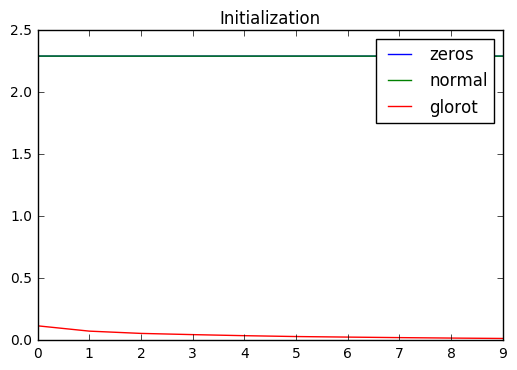

In [48]:
#1. Weigths initialization

import time

#training 10 epochs
start_time = time.time()

epochs=10

zeros_losses=[]
normal_losses=[]
glorot_losses=[]

weigths=['zeros', 'normal', 'glorot']

for i, init in enumerate(weigths, 0):
    
    # input_dim, output_dim, hidden_dims=(1024,2048), n_hidden=2, initialization='zeros', mode=',train',
    # datapath=None,model_path=None

    NN_digits= NN(784, 10, hidden_dims=(500,300), initialization=init)

    for epoch in range (epochs): 
    #x, y, mb_size=100, learning_rate=1e-1, weight_decay=0
    
        loss=NN_digits.train_mbatch(X_train, digit_y_train_onehot, mb_size=100)
        
        if (init=='zeros'):
            zeros_losses.append(loss)
        if (init == 'normal'):
            normal_losses.append(loss)
        if (init == 'glorot'):
            glorot_losses.append(loss)
            
time_mb = time.time() - start_time
print('Time with minibatch gradient decent implementation: %f seconds\n' % time_mb)


fig = plt.figure()
plt.plot(range(epochs),  zeros_losses, label='zeros')
plt.plot(range(epochs), normal_losses, label='normal')
plt.plot(range(epochs), glorot_losses, label='glorot')
plt.title("Initialization")

plt.legend()
plt.show()


In [50]:
#https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python

import gzip
def dataloader_X(filename, rows, cols, image_size = 0):
    f = gzip.open(filename,'r')
    image_size = image_size
    num_images = rows

    f.read(8)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float)
    c=data.reshape(rows, image_size, image_size)
    print(c.shape)
    c=data.reshape(rows, (image_size*image_size) )
    print(c.shape)  
        
    return c

def dataloader_y(filename, rows):
    f = gzip.open(filename,'r')

    f.read(8)
    buf = f.read()
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float)
    print(labels.shape)  
        
    return labels

In [51]:
X_train = dataloader_X('train-images-idx3-ubyte.gz', 60000, 284, image_size = 28 )
X_test = dataloader_X('t10k-images-idx3-ubyte.gz', 10000, 284, image_size = 28 )
y_train = dataloader_y('train-labels-idx1-ubyte.gz', 60000)
y_test =  dataloader_y('t10k-labels-idx1-ubyte.gz', 10000)

X_train= X_train / 255
X_test = X_test / 255

indices = list(range(len(X_train)))
shuffle(indices)

X_valid, y_valid = X_train[indices[55000:]], y_train[indices[55000:]]
X_train, y_train = X_train[indices[:55000]], y_train[indices[:55000]]

digit_y_train_onehot= onehot (y_train, 10)
digit_y_valid_onehot= onehot (y_valid, 10)
digit_y_test_onehot= onehot (y_test, 10)


print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_valid shape = ', X_valid.shape)
print('y_valid shape = ', y_valid.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)
(60000,)
(10000,)
X_train shape =  (55000, 784)
y_train shape =  (55000,)
X_valid shape =  (5000, 784)
y_valid shape =  (5000,)
X_test shape =  (10000, 784)
y_test shape =  (10000,)


Weigths initialization data from dataloader


C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:373: RuntimeWarning: divide by zero encountered in log
C:\Miniconda3\lib\site-packages\ipykernel\__main__.py:373: RuntimeWarning: invalid value encountered in multiply


Time with minibatch gradient decent implementation: 867.412985 seconds



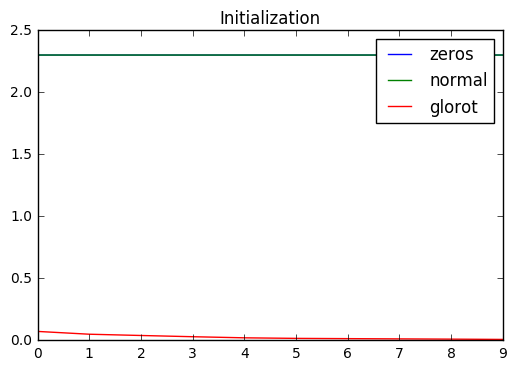

In [53]:
#1. Weigths initialization data from dataloader

print('Weigths initialization data from dataloader')

import time

#training 10 epochs
start_time = time.time()

epochs=10

zeros_losses=[]
normal_losses=[]
glorot_losses=[]

weigths=['zeros', 'normal', 'glorot']

for i, init in enumerate(weigths, 0):
    
    # input_dim, output_dim, hidden_dims=(1024,2048), n_hidden=2, initialization='zeros', mode=',train',
    # datapath=None,model_path=None

    NN_digits= NN(784, 10, hidden_dims=(500,300), initialization=init)

    for epoch in range (epochs): 
    #x, y, mb_size=100, learning_rate=1e-1, weight_decay=0
    
        loss=NN_digits.train_mbatch(X_train, digit_y_train_onehot, mb_size=100)
        
        if (init=='zeros'):
            zeros_losses.append(loss)
        if (init == 'normal'):
            normal_losses.append(loss)
        if (init == 'glorot'):
            glorot_losses.append(loss)
            
time_mb = time.time() - start_time
print('Time with minibatch gradient decent implementation: %f seconds\n' % time_mb)


fig = plt.figure()
plt.plot(range(epochs),  zeros_losses, label='zeros')
plt.plot(range(epochs), normal_losses, label='normal')
plt.plot(range(epochs), glorot_losses, label='glorot')
plt.title("Initialization")

plt.legend()
plt.show()



In [ ]:
### 1. Parameter search 

# input_dim, output_dim,hidden_dims=(1024,2048),n_hidden=2,mode=',train',
# datapath=None,model_path=None

NN_digits_mbatch= NN(784, 10, hidden_dims=(500,300))

#training 10 epochs
start_time = time.time()

epoc=[]
train_losses=[]
train_accuracies=[]
valid_losses=[]
valid_accuracies=[]
test_losses_mb=[]
test_accuracies_mb=[]

epochs=10

print('epoch      train loss      train accuracy         test loss         test accuracy  ')

weigths=['zeros', 'normal', 'glorot']

for i, init in enumerate(weigths, 0):
    
    print (init)
    
    # input_dim, output_dim, hidden_dims=(1024,2048), n_hidden=2, initialization='zeros', mode=',train',
    # datapath=None,model_path=None

    NN_digits= NN(784, 10, hidden_dims=(500,300), initialization=init)

    for epoch in range (epochs): 
    #x, y, mb_size=100, learning_rate=1e-1, weight_decay=0
        loss=NN_digits.train_mbatch(X_train, digit_y_train_onehot, mb_size=100)
    
        loss_train_mb, accuracy_train_mb = NN_digits.test_mbatch(X_train, digit_y_train_onehot, 
                                                                        y_train)
    
        loss_valid_mb, accuracy_valid_mb = NN_digits.test_mbatch(X_valid, digit_y_valid_onehot, 
                                                                        y_valid)
    
    
        loss_test_mb, accuracy_test_mb = NN_digits.test_mbatch(X_test, digit_y_test_onehot,
                                                                      y_test)
        
        print(epoch, '  ', loss_train_mb, '  ', accuracy_train_mb , '  ', loss_test_mb,
          '  ', accuracy_test_mb)
        
        epoc.append(epoch)
        train_losses_mb.append(loss_train_mb)
        train_accuracies_mb.append(accuracy_train_mb)
        valid_losses_mb.append(loss_valid_mb)
        valid_accuracies_mb.append(accuracy_valid_mb)
        test_losses_mb.append(loss_test_mb)
        test_accuracies_mb.append(accuracy_test_mb)
    
        
    
    
time_mb = time.time() - start_time

print('Time with minibatch gradient decent implementation: %f seconds\n' % time_mb)

Parameter search

Finite difference

In [54]:
#Approximation of the gradient of the loos at the end of training, with respect to W3 
# (the second layer weigths) with to the first p = min(10;m) elements of W3.


#function to calculate the finite difference for  

def loop_finite_diff(self, x, y, epsilon=1e-5):
        a1, h1, a2, h2, oa, os = self.forward(x)
        grads = self.backward(x, y, a1, h1, a2, h2, oa, os)
        loss = self.loss(y, os)
        
        grads_finite_diff = []
        
        for p in self.parameters[0]:
            grad_fdiff = np.zeros(shape=p.shape)
            for i, v in np.ndenumerate(p):
                p[i] += epsilon
                _, _, _, _, _, os = self.forward(x)
                loss_diff = self.loss(os, y)
                grad_fdiff[index] = (loss_diff - loss) / epsilon
                p[index] -= epsilon
            grads_finite_diff.append(grad_fdiff)
        return gradients_finite_diff

In [63]:
#1. epsilon = 1 / N

#Use at least 5 values of N from the set {k10**i : i E {0; : : : ; 5g} k E {1, 5}}
epsilon=[]
N = []
for exp in range (1, 6, 2):
    a= 10**exp
    N.append(a)
for exp in range (1, 5, 2):
    b= 5*10**exp
    N.append(b)
for i in range (5):
    epsilon.append(1/N[i])

print (N)
print (epsilon)




[10, 1000, 100000, 50, 5000]
[0.1, 0.001, 1e-05, 0.02, 0.0002]


In [81]:
epoc.append(epoch)
train_losses_mb.append(loss_train_mb)
train_accuracies_mb.append(accuracy_train_mb)
valid_losses_mb.append(loss_valid_mb)
valid_accuracies_mb.append(accuracy_valid_mb)
test_losses_mb.append(loss_test_mb)
test_accuracies_mb.append(accuracy_test_mb)

print ()
    